Sankey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import defaultdict
import csv
import networkx as nx
import nxviz as nxv
import community

https://coderzcolumn.com/tutorials/data-science/how-to-plot-sankey-diagram-in-python-jupyter-notebook-holoviews-and-plotly

In [2]:
with open('CAENode.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

df=pd.read_csv('cae-edge-all.csv')
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [3]:
G=nx.from_pandas_edgelist(df,source="Local",target="Remote")
#G = nx.Graph() # Initialize a Graph object
G.add_nodes_from(node_names) # Add nodes to the Graph
#G.add_edges_from(edges) # Add edges to the Graph
print(nx.info(G)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 19989
Number of edges: 720471
Average degree:  72.0867


In [4]:

level_dict = {}

deg_dict = {}

In [5]:
for node in nodes: # Loop through the list, one row at a time
    
    level_dict[node[0]] = node[3]
   
    deg_dict = nx.degree_centrality(G)

In [6]:

nx.set_node_attributes(G, level_dict, 'level')

nx.set_node_attributes(G, deg_dict, 'deg_cen')

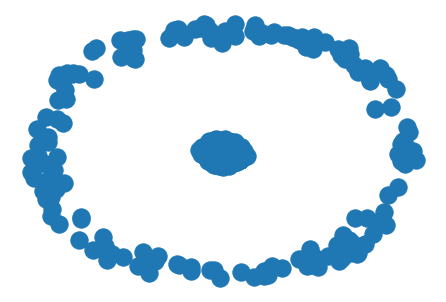

In [15]:
nx.draw(G, with_labels=False)